# Eloy Bravo

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Código para centrar los gráficos en el notebook
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## Dataset

El dataset contiene datos sobre clientes de una entidad financiera, datos como su nombre, el segmento generacional, region, su fuente de ingresos entre otras que se verán extraídas en las celdas a continuación.

In [3]:
todos_los_datos = pd.read_excel('Datos.xlsx')
todos_los_datos.head()

,CLTE,SEGMENTO_ESTRATEGICO,REGION,PROVINCIA,NOMBRE_PLAZA,INGRESO_FINAL,FUENTE_INGRESO,IDEPENDENCIA_LABORAL,ANTIGUEDAD,SCORE,...,PLAZO_PRE,SALDO_PRE,QANT,IVC_ACT,PAS_SALMED_MES,ACT_SALMED_MES,GAR_SALMED_MES,APC_SALMED_MES,RRENT_OPE_ACUM,AGENCIA
0,161640,PERSONAS,CENTRO,LOS RIOS,QUEVEDO,90,SALARIO,VOLUNTARIO,01/12/2014,0,...,136.138004,5299.212842,SIN,0,0.21,0.0,0.0,0.21,-2.1766,10-QUEVEDO
1,161683,PERSONAS,CENTRO,GUAYAS,GUAYAQUIL,274,PENSIONES,INFORMAL,NaN,941,...,181.323385,1396.725241,SIN,1,93.92,0.0,0.0,93.92,-9.6244,01-MATRIZ
2,161703,PERSONAS,CENTRO,GUAYAS,GUAYAQUIL,26073,ACCIONISTAS,INDEPENDIENTE,28/01/1982,992,...,102.828333,14897.528640,SIN,0,0.00,0.0,0.0,0.00,-2.0187,01-MATRIZ
3,161706,PERSONAS,CENTRO,GUAYAS,GUAYAQUIL,825,SALARIO,DEPENDIENTE,01/11/2020,221,...,112.311181,8386.279886,SIN,0,0.00,0.0,0.0,0.00,0.1100,01-MATRIZ
4,161746,PERSONAS,CENTRO,GUAYAS,MILAGRO,656,RUC EQUIFAX,INDEPENDIENTE,02/09/2005,958,...,123.979181,11818.443640,SIN,0,0.01,0.0,0.0,0.01,-2.1783,08-MILAGRO


Estas son todas las features que contiene el dataset.

In [4]:
features = todos_los_datos.columns
print('Variables en el dataset:\n {}'.format(', '.join(features)))

Variables en el dataset:
 CLTE, SEGMENTO_ESTRATEGICO, REGION, PROVINCIA, NOMBRE_PLAZA, INGRESO_FINAL, FUENTE_INGRESO, IDEPENDENCIA_LABORAL, ANTIGUEDAD, SCORE, SCORE_SOBREENDEUDAMIENTO, CUOTA_ESTIMADA, DES_ESTADO_CIVIL, SEG_GENERACIONAL, DES_SEXO, NIVEL_ESTUDIOS, DEUDA, DP_SEGMENTO, DP_VVS, DP_VRS, DP_VPS, TIENEN_POLIZAS, CANT_POLIZAS, SALDO, TASA_POND, PAZO_MAX, PLAZO_PROM, DISTANCIA, PLAZO_PRE, SALDO_PRE, QANT, IVC_ACT, PAS_SALMED_MES, ACT_SALMED_MES, GAR_SALMED_MES, APC_SALMED_MES, RRENT_OPE_ACUM, AGENCIA


Para un mejor manejo de las mismas hay que ver cuales son las que tienen datos númericos y cuales son las categóricas o de tipo Object.

In [5]:
num_variables, obj_variables = [], []
for feat in features:
    if todos_los_datos[feat].dtype == 'object':
        obj_variables.append(feat)
    else:
        num_variables.append(feat)
print('Columnas con datos numéricos:\n{}'.format(', '.join(num_variables)))
print('\nColumnas con datos categóricos:\n{}'.format(', '.join(obj_variables)))

Columnas con datos numéricos:
CLTE, INGRESO_FINAL, SCORE, SCORE_SOBREENDEUDAMIENTO, CUOTA_ESTIMADA, DEUDA, TIENEN_POLIZAS, CANT_POLIZAS, SALDO, TASA_POND, PAZO_MAX, PLAZO_PROM, DISTANCIA, PLAZO_PRE, SALDO_PRE, IVC_ACT, PAS_SALMED_MES, ACT_SALMED_MES, GAR_SALMED_MES, APC_SALMED_MES, RRENT_OPE_ACUM

Columnas con datos categóricos:
SEGMENTO_ESTRATEGICO, REGION, PROVINCIA, NOMBRE_PLAZA, FUENTE_INGRESO, IDEPENDENCIA_LABORAL, ANTIGUEDAD, DES_ESTADO_CIVIL, SEG_GENERACIONAL, DES_SEXO, NIVEL_ESTUDIOS, DP_SEGMENTO, DP_VVS, DP_VRS, DP_VPS, QANT, AGENCIA


Veamos si existen features con valores Null o NaN.

In [6]:
todos_los_datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33312 entries, 0 to 33311
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLTE                      33312 non-null  int64  
 1   SEGMENTO_ESTRATEGICO      33312 non-null  object 
 2   REGION                    33312 non-null  object 
 3   PROVINCIA                 33312 non-null  object 
 4   NOMBRE_PLAZA              33312 non-null  object 
 5   INGRESO_FINAL             33312 non-null  int64  
 6   FUENTE_INGRESO            33312 non-null  object 
 7   IDEPENDENCIA_LABORAL      33312 non-null  object 
 8   ANTIGUEDAD                28710 non-null  object 
 9   SCORE                     33312 non-null  int64  
 10  SCORE_SOBREENDEUDAMIENTO  33312 non-null  int64  
 11  CUOTA_ESTIMADA            33312 non-null  int64  
 12  DES_ESTADO_CIVIL          33312 non-null  object 
 13  SEG_GENERACIONAL          33312 non-null  object 
 14  DES_SE

### Resumen estadístico

Veamos un resumen estadístico de las variables númericas en nuestro dataset.

In [22]:
todos_los_datos.describe()

,CLTE,INGRESO_FINAL,SCORE,SCORE_SOBREENDEUDAMIENTO,CUOTA_ESTIMADA,DEUDA,TIENEN_POLIZAS,CANT_POLIZAS,SALDO,TASA_POND,...,PLAZO_PROM,DISTANCIA,PLAZO_PRE,SALDO_PRE,IVC_ACT,PAS_SALMED_MES,ACT_SALMED_MES,GAR_SALMED_MES,APC_SALMED_MES,RRENT_OPE_ACUM
count,3.331200e+04,3.331200e+04,33312.000000,33312.000000,33312.000000,3.331200e+04,33312.000000,33312.000000,3.331200e+04,33312.000000,...,33312.000000,33312.000000,33312.000000,3.331200e+04,33312.000000,3.331200e+04,3.331200e+04,33312.000000,3.331200e+04,33312.000000
mean,1.149449e+06,2.623401e+03,642.562020,404.006274,927.899856,1.336548e+04,0.399616,0.509036,1.597238e+04,1.785580,...,90.538947,0.358586,170.219338,1.844322e+04,1.720371,1.968482e+04,2.671412e+03,19.227463,2.237546e+04,41.202429
std,7.653888e+05,2.102570e+04,412.212486,275.457832,4278.326389,6.292609e+04,0.489827,0.913497,8.311718e+04,2.526730,...,152.176787,0.426587,72.055983,5.820231e+04,1.381074,9.163060e+04,2.053443e+04,1225.621826,9.660142e+04,550.390108
min,1.900000e+02,1.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,-17457.931500
25%,6.183560e+05,5.000000e+02,72.000000,122.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.005431,114.081947,2.226423e+03,1.000000,8.900000e-01,0.000000e+00,0.000000,1.717500e+01,-8.232525
50%,1.037738e+06,1.061000e+03,901.000000,456.000000,221.000000,1.474000e+03,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.146623,160.508013,7.621070e+03,2.000000,3.053650e+02,0.000000e+00,0.000000,1.868205e+03,-1.326850
75%,1.511542e+06,2.405000e+03,958.000000,636.000000,902.000000,9.745500e+03,1.000000,1.000000,6.000000e+03,4.700000,...,180.000000,0.617060,214.792981,1.346868e+04,3.000000,1.017697e+04,4.478025e+02,0.000000,1.364700e+04,52.374300
max,4.008694e+06,3.075381e+06,999.000000,963.000000,440665.000000,5.256657e+06,1.000000,48.000000,6.068419e+06,8.062047,...,3737.000000,1.551055,735.164175,1.959392e+06,8.000000,6.836703e+06,1.173635e+06,170000.000000,6.836734e+06,23243.672900


## Exploración de variables categóricas

Antes de la creación del dashboard exploremos algunas de las variables categóricas de manera visual para ver la cantidad de datos que hay por cada categoría en las diferentes columnas.

In [8]:
def plot_bars(data, col):
    """
    Función para mostrar en un gráfico de barras la cantidad de categorías en una columna
    """
    cat = data[col].value_counts().keys().tolist()
    cantidad = data[col].value_counts().tolist()
    sns.set_theme()
    ax = sns.barplot(x=cat, y=cantidad, dodge=False)
    total = sum(cantidad)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 0.5,
                '{:1.2f}%'.format(height/total * 100),
                ha="center") 
    ax.set_xticklabels(labels=cat, rotation=90)
    return ax

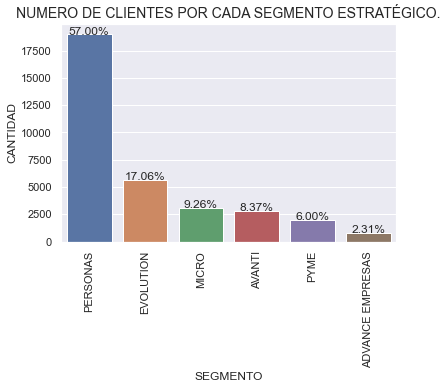

In [9]:
ax1 = plot_bars(todos_los_datos, 'SEGMENTO_ESTRATEGICO')
plt.xlabel('SEGMENTO')
plt.ylabel('CANTIDAD')
plt.title('NUMERO DE CLIENTES POR CADA SEGMENTO ESTRATÉGICO.', fontsize=14)
plt.show()

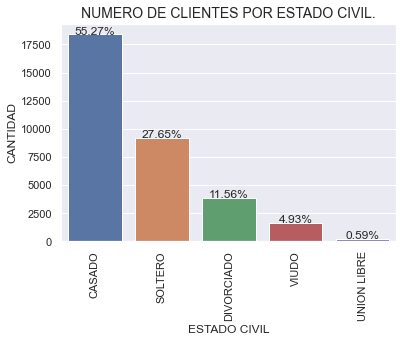

In [10]:
ax2 = plot_bars(todos_los_datos, 'DES_ESTADO_CIVIL')
plt.xlabel('ESTADO CIVIL')
plt.ylabel('CANTIDAD')
plt.title('NUMERO DE CLIENTES POR ESTADO CIVIL.', fontsize=14)
plt.show()

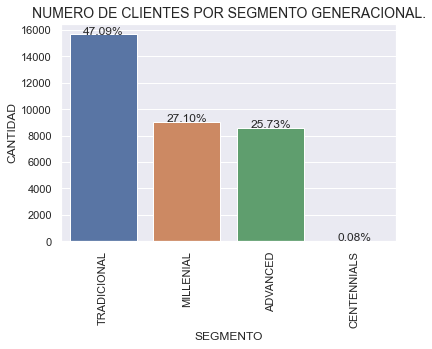

In [11]:
ax3 = plot_bars(todos_los_datos, 'SEG_GENERACIONAL')
plt.xlabel('SEGMENTO')
plt.ylabel('CANTIDAD')
plt.title('NUMERO DE CLIENTES POR SEGMENTO GENERACIONAL.', fontsize=14)
plt.show()

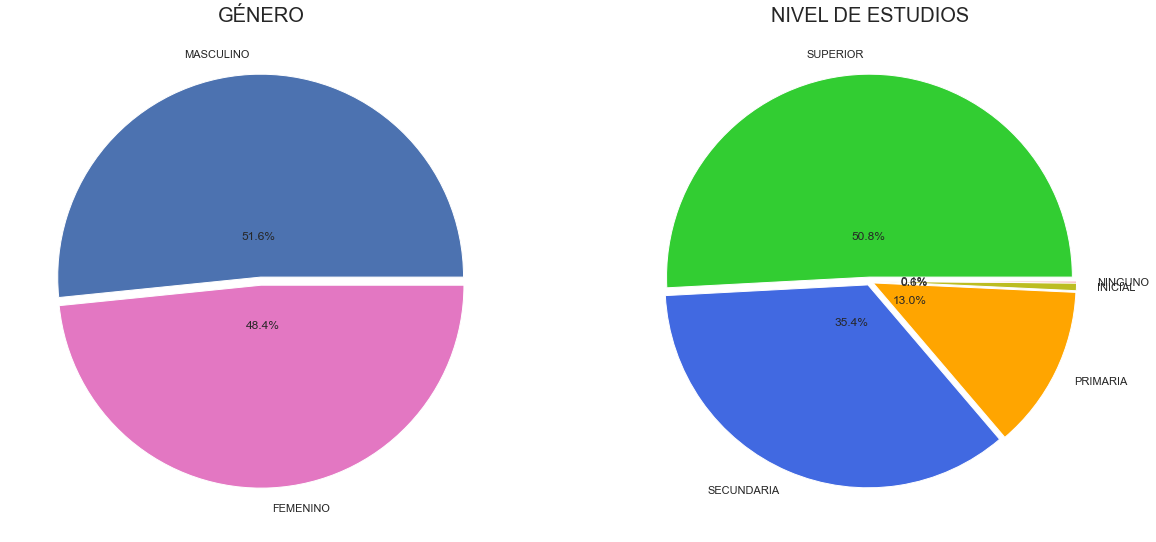

In [20]:
# Datos sobre género
genero = todos_los_datos['DES_SEXO'].value_counts().keys().tolist()
cantidad_genero = todos_los_datos['DES_SEXO'].value_counts().tolist()
# Datos sobre nivel de estudios
nivel = todos_los_datos['NIVEL_ESTUDIOS'].value_counts().keys().tolist()
cantidad_por_nivel = todos_los_datos['NIVEL_ESTUDIOS'].value_counts().tolist()
# Gráficos
fig, (ax4, ax5) = plt.subplots(1, 2, figsize=(20, 10))
# Género
ax4.pie(cantidad_genero, labels=genero, autopct='%.1f%%', pctdistance=0.2, explode=[0.02]*2, colors=['b', 'tab:pink'])
ax4.set_title('GÉNERO', fontsize=20)
# Nivel de estudios
ax5.pie(cantidad_por_nivel, labels=nivel, autopct='%.1f%%', pctdistance=0.2,
        explode=[0.02]*5, colors=['limegreen', 'royalblue', 'orange', 'tab:olive', 'lightcoral'])
ax5.set_title('NIVEL DE ESTUDIOS', fontsize=20)
plt.show()

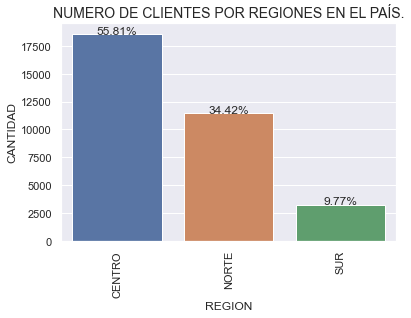

In [24]:
ax6 = plot_bars(todos_los_datos, 'REGION')
plt.xlabel('REGION')
plt.ylabel('CANTIDAD')
plt.title('NUMERO DE CLIENTES POR REGIONES EN EL PAÍS.', fontsize=14)
plt.show()